In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from scipy import sparse
import pickle
from sklearn.feature_selection import SelectFromModel

In [3]:
import matplotlib.pyplot as plt

In [4]:
features_dir227 = './features_227_repo/'
features_dir306 = './features_306_repo/'
data_dir = "./data/FT_Camp_2/"
inter_dir = "./inter_data_repo/2/"

## 导入数据，特征

In [5]:
# 训练数据
train227 = pd.read_csv(data_dir + 'train.csv')

# 预测目标用户
pred_users306 = pd.read_csv(data_dir + 'pred_users.csv')

In [6]:
# 导入数据
features227 = train227[['id']]

用户基础属性227 = pd.read_csv(features_dir227 + "用户基础属性.csv")
features227 = pd.merge(features227, 用户基础属性227, on='id', how='left')

收入总和227 = pd.read_csv(features_dir227 + "收入总和.csv")
features227 = pd.merge(features227, 收入总和227, on='id', how='left')

支出总和227 = pd.read_csv(features_dir227 + "支出总和.csv")
features227 = pd.merge(features227, 支出总和227, on='id', how='left')

收支总和227 = pd.read_csv(features_dir227 + "收支总和.csv")
features227 = pd.merge(features227, 收支总和227, on='id', how='left')

收支记录次数227 = pd.read_csv(features_dir227 + "收支记录次数.csv")
features227 = pd.merge(features227, 收支记录次数227, on='id', how='left')

收入最大值227 = pd.read_csv(features_dir227 + "收入最大值.csv")
features227 = pd.merge(features227, 收入最大值227, on='id', how='left')

支出最大值227 = pd.read_csv(features_dir227 + "支出最大值.csv")
features227 = pd.merge(features227, 支出最大值227, on='id', how='left')

各类别收支记录次数227 = pd.read_csv(features_dir227 + "各类别收支记录次数.csv")
features227 = pd.merge(features227, 各类别收支记录次数227, on='id', how='left')

各类别收支金额227 = pd.read_csv(features_dir227 + "各类别收支金额.csv")
features227 = pd.merge(features227, 各类别收支金额227, on='id', how='left')

各原始类别收支记录次数227 = pd.read_csv(features_dir227 + "各原始类别收支记录次数.csv")
features227 = pd.merge(features227, 各原始类别收支记录次数227, on='id', how='left')

各原始类别收支金额227 = pd.read_csv(features_dir227 + "各原始类别收支金额.csv")
features227 = pd.merge(features227, 各原始类别收支金额227, on='id', how='left')

# 细粒度收支总和_10227 = pd.read_csv(features_dir227 + "细粒度收支总和_10.csv")
# features227 = pd.merge(features227, 细粒度收支总和_10227, on='id', how='left')

# 对应时间收支总和227 = pd.read_csv(features_dir227 + "对应时间收支总和.csv")
# features227 = pd.merge(features227, 对应时间收支总和227, on='id', how='left')

# 对应时间支出总和227 = pd.read_csv(features_dir227 + "对应时间支出总和.csv")
# features227 = pd.merge(features227, 对应时间支出总和227, on='id', how='left')

# 对应时间收入总和227 = pd.read_csv(features_dir227 + "对应时间收入总和.csv")
# features227 = pd.merge(features227, 对应时间收入总和227, on='id', how='left')

收入均值227 = pd.read_csv(features_dir227 + "收入均值.csv")
features227 = pd.merge(features227, 收入均值227, on='id', how='left')

支出均值227 = pd.read_csv(features_dir227 + "支出均值.csv")
features227 = pd.merge(features227, 支出均值227, on='id', how='left')

收支均值227 = pd.read_csv(features_dir227 + "收支均值.csv")
features227 = pd.merge(features227, 收支均值227, on='id', how='left')

# 各类别收支平均金额227 = pd.read_csv(features_dir227 + "各类别收支平均金额.csv")
# features227 = pd.merge(features227, 各类别收支平均金额227, on='id', how='left')

# 细粒度收支总和_58227 = pd.read_csv(features_dir227 + "细粒度收支总和_58.csv")
# features227 = pd.merge(features227, 细粒度收支总和_58227, on='id', how='left')

features227.head()

NameError: name 'train227' is not defined

In [7]:
XY227 = pd.merge(features227, train227, on='id', how='left')
XY227.head()

,id,gender,age,aum227,收入总和,支出总和,收支总和,收支记录次数,收入最大值,支出最大值,...,YEPD_y,YFTB_y,YKHK_y,YKJJ_y,YKZZ_y,nan_y,收入均值,支出均值,收支均值,click_w228
0,1,0,52.0,219481.95,120873.00,-72587.00,48286.00,13.0,56388.00,-50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20145.500000,-10369.571429,3714.307692,0
1,2,0,32.0,236183.79,348701.71,-340247.40,8454.31,31.0,96000.00,-316000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20511.865294,-24303.385714,272.719677,0
2,3,0,22.0,0.06,6920.67,-12561.21,-5640.54,167.0,6841.06,-3000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2306.890000,-76.592744,-33.775689,0
3,4,1,21.0,420.26,2110.00,-2093.93,16.07,50.0,520.00,-520.0,...,0.0,0.0,0.0,0.0,0.0,0.0,124.117647,-63.452424,0.321400,0
4,6,1,34.0,231.42,829116.97,-829294.89,-177.92,81.0,300000.00,-300000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37687.135000,-14055.845593,-2.196543,0


In [8]:
X227 = XY227.iloc[:,1:-1]
Y227 = XY227.iloc[:,-1]

In [9]:
print(train227.shape)
print(用户基础属性227.shape)
print(收入总和227.shape)
print(支出总和227.shape)
print(features227.shape)

(108252, 2)
(124000, 4)
(118619, 2)
(121438, 2)
(108252, 851)


In [10]:
features306 = pred_users306[['id']]

用户基础属性306 = pd.read_csv(features_dir306 + "用户基础属性.csv")
features306 = pd.merge(features306, 用户基础属性306, on='id', how='left')

收入总和306 = pd.read_csv(features_dir306 + "收入总和.csv")
features306 = pd.merge(features306, 收入总和306, on='id', how='left')

支出总和306 = pd.read_csv(features_dir306 + "支出总和.csv")
features306 = pd.merge(features306, 支出总和306, on='id', how='left')

收支总和306 = pd.read_csv(features_dir306 + "收支总和.csv")
features306 = pd.merge(features306, 收支总和306, on='id', how='left')

收支记录次数306 = pd.read_csv(features_dir306 + "收支记录次数.csv")
features306 = pd.merge(features306, 收支记录次数306, on='id', how='left')

收入最大值306 = pd.read_csv(features_dir306 + "收入最大值.csv")
features306 = pd.merge(features306, 收入最大值306, on='id', how='left')

支出最大值306 = pd.read_csv(features_dir306 + "支出最大值.csv")
features306 = pd.merge(features306, 支出最大值306, on='id', how='left')

各类别收支记录次数306 = pd.read_csv(features_dir306 + "各类别收支记录次数.csv")
features306 = pd.merge(features306, 各类别收支记录次数306, on='id', how='left')

各类别收支金额306 = pd.read_csv(features_dir306 + "各类别收支金额.csv")
features306 = pd.merge(features306, 各类别收支金额306, on='id', how='left')

各原始类别收支记录次数306 = pd.read_csv(features_dir306 + "各原始类别收支记录次数.csv")
features306 = pd.merge(features306, 各原始类别收支记录次数306, on='id', how='left')

各原始类别收支金额306 = pd.read_csv(features_dir306 + "各原始类别收支金额.csv")
features306 = pd.merge(features306, 各原始类别收支金额306, on='id', how='left')

# 细粒度收支总和_10306 = pd.read_csv(features_dir306 + "细粒度收支总和_10.csv")
# features306 = pd.merge(features306, 细粒度收支总和_10306, on='id', how='left')

# 对应时间收支总和306 = pd.read_csv(features_dir306 + "对应时间收支总和.csv")
# features306 = pd.merge(features306, 对应时间收支总和306, on='id', how='left')

# 对应时间支出总和306 = pd.read_csv(features_dir306 + "对应时间支出总和.csv")
# features306 = pd.merge(features306, 对应时间支出总和306, on='id', how='left')

# 对应时间收入总和306 = pd.read_csv(features_dir306 + "对应时间收入总和.csv")
# features306 = pd.merge(features306, 对应时间收入总和306, on='id', how='left')

收入均值306 = pd.read_csv(features_dir306 + "收入均值.csv")
features306 = pd.merge(features306, 收入均值306, on='id', how='left')

支出均值306 = pd.read_csv(features_dir306 + "支出均值.csv")
features306 = pd.merge(features306, 支出均值306, on='id', how='left')

收支均值306 = pd.read_csv(features_dir306 + "收支均值.csv")
features306 = pd.merge(features306, 收支均值306, on='id', how='left')

# 各类别收支平均金额306 = pd.read_csv(features_dir306 + "各类别收支平均金额.csv")
# features306 = pd.merge(features306, 各类别收支平均金额306, on='id', how='left')

# 细粒度收支总和_58306 = pd.read_csv(features_dir306 + "细粒度收支总和_58.csv")
# features306 = pd.merge(features306, 细粒度收支总和_58306, on='id', how='left')

features306.head()

,id,gender,age,aum227,收入总和,支出总和,收支总和,收支记录次数,收入最大值,支出最大值,...,YEPC_y,YEPD_y,YFTB_y,YKHK_y,YKJJ_y,YKZZ_y,nan_y,收入均值,支出均值,收支均值
0,1,0,52.0,183186.95,131673.00,-119682.00,11991.00,17.0,56388.00,-50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18810.428571,-11968.200000,705.352941
1,2,0,32.0,228428.96,344531.20,-348116.40,-3585.20,31.0,96000.00,-316000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22968.746667,-21757.275000,-115.651613
2,3,0,22.0,1977.68,16136.37,-18189.36,-2052.99,162.0,9245.31,-3000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5378.790000,-114.398491,-12.672778
3,4,1,21.0,392.47,1910.00,-1905.03,4.97,44.0,520.00,-520.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.333333,-65.690690,0.112955
4,5,0,32.0,149.65,137770.08,-137714.49,55.59,39.0,26941.90,-26941.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9184.672000,-5738.103750,1.425385


In [ ]:
X306_raw = pd.merge(pred_users306, features306, on='id', how='left')
X306_raw.head()

In [ ]:
X306 = X306_raw.iloc[:,1:]
X306.columns = X227.columns
X306.head()

In [1]:
print(features306.shape)

NameError: name 'features306' is not defined

## 训练模型

In [15]:
X227_csr = sparse.csr_matrix(X227)
X306_csr = sparse.csr_matrix(X306)

In [17]:
# %%time
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds306 = np.zeros((X306_csr.shape[0]))
i = 0
models = [0]*kf.get_n_splits()
roc_scores = []
for train_index, val_index in kf.split(X227_csr, Y227):
    X_train, X_val = X227_csr[train_index], X227_csr[val_index]
    y_train, y_val = Y227[train_index], Y227[val_index]
    eval_set = [(X_train, y_train), (X_val, y_val)]
#     sample_weight227_train = sample_weight227[train_index]
    models[i] = xgb.XGBClassifier(n_estimators=300,
                                  n_jobs = 6,
                                  random_state=42)
#     models[i].fit(X_train, y_train, eval_metric=['auc', "error", "logloss"], eval_set=eval_set, verbose=False, early_stopping_rounds=40, sample_weight=sample_weight227_train)
    models[i].fit(X_train, y_train, eval_metric=['auc', "error", "logloss"], eval_set=eval_set, verbose=False)

    score = models[i].predict_proba(X_val)[:, 1]
    
    roc = roc_auc_score(y_val, score)
    roc_scores.append(roc)
    
    print(roc)
    
    preds306 = preds306 + models[i].predict_proba(X306_csr)[:,1]
    
    i+=1

preds306 = preds306 / kf.get_n_splits()
pickle.dump(preds306, open(inter_dir + 'preds306.p', 'wb'))
print("mean_roc_score: {}".format(np.mean(roc_scores)))

0.6989670233580939
0.6996292075736326
0.69631158008658
0.6995773051948053
0.6964805086580086
mean_roc_score: 0.698193124974224


In [19]:
for i in range(kf.get_n_splits()):
    results = models[i].evals_result()
    print(len(results['validation_0']['auc']))

300
300
300
300
300


## 筛选特征
保存feature_score, 把大于0分的feature保存到sfeatures中

In [24]:
# 保存模型的feature_scores
for i in range(kf.get_n_splits()):
    model = models[i]
    feature_scores = pd.DataFrame(list(X306.columns), columns=['feature'])
    feature_scores['score'] = model.feature_importances_
    feature_scores['rank'] = feature_scores['score'].rank(method = 'min', ascending=False)
    feature_scores = feature_scores.sort_values('score',ascending=False)
    feature_scores.to_csv(inter_dir + 'feature_scores007_'+str(i)+'.csv')
feature_scores.head()

,feature,score,rank
368,ONNK_x,0.030023,1.0
727,ONNK_y,0.024820,2.0
2,aum227,0.024003,3.0
114,210_y,0.023948,4.0
790,SDRP_y,0.020002,5.0


In [52]:
# X227.loc[:,['gender','age']]
sfeatures = set()
for i in range(kf.get_n_splits()):
    feature_scores = pd.read_csv(inter_dir + 'feature_scores007_'+str(i)+'.csv')
    sfeatures |= set(feature_scores.loc[feature_scores['score']>0.0000, 'feature'])
sfeatures = list(sfeatures)

In [53]:
pickle.dump(sfeatures, open(inter_dir + 'sfeatures.p','wb'))

In [54]:
sfeatures = pickle.load(open(inter_dir + 'sfeatures.p','rb'))

In [55]:
sfeatures[:10]

['122_y',
 '308_y',
 'FEAA_x',
 'XYPY_y',
 'ISCP_y',
 'PTFI_y',
 'ONBX_y',
 'FX96_y',
 '212_x',
 'AGSB_y']

## 验证特征筛选后，是否影响性能
结果：不影响

In [43]:
print(X227_csr.shape)
print(X306_csr.shape)

(108252, 850)
(94655, 850)


In [44]:
X227_csr = sparse.csr_matrix(X227.loc[:,sfeatures])
X306_csr = sparse.csr_matrix(X306.loc[:,sfeatures])

In [45]:
print(X227_csr.shape)
print(X306_csr.shape)

(108252, 314)
(94655, 314)


In [56]:
# %%time
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds306 = np.zeros((X306_csr.shape[0]))
i = 0
models = [0]*kf.get_n_splits()
roc_scores = []
for train_index, val_index in kf.split(X227_csr, Y227):
    X_train, X_val = X227_csr[train_index], X227_csr[val_index]
    y_train, y_val = Y227[train_index], Y227[val_index]
    eval_set = [(X_train, y_train), (X_val, y_val)]
#     sample_weight227_train = sample_weight227[train_index]
    models[i] = xgb.XGBClassifier(n_estimators=400,
                                  n_jobs = 6,
                                  random_state=42)
#     models[i].fit(X_train, y_train, eval_metric=['auc', "error", "logloss"], eval_set=eval_set, verbose=False, early_stopping_rounds=40, sample_weight=sample_weight227_train)
    models[i].fit(X_train, y_train, eval_metric=['auc', "error", "logloss"], eval_set=eval_set, verbose=False)

    score = models[i].predict_proba(X_val)[:, 1]
    
    roc = roc_auc_score(y_val, score)
    roc_scores.append(roc)
    
    print(roc)
    
    preds306 = preds306 + models[i].predict_proba(X306_csr)[:,1]
    
    i+=1

preds306 = preds306 / kf.get_n_splits()
pickle.dump(preds306, open(inter_dir + 'preds306.p', 'wb'))
print("mean_roc_score: {}".format(np.mean(roc_scores)))

0.6985449998268488
0.6996074879227053
0.6963534307359307
0.699112012987013
0.6965032142857143
mean_roc_score: 0.6980242291516424


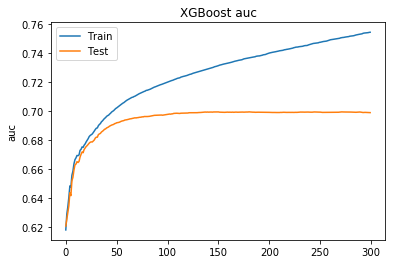

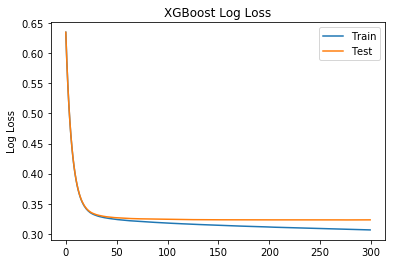

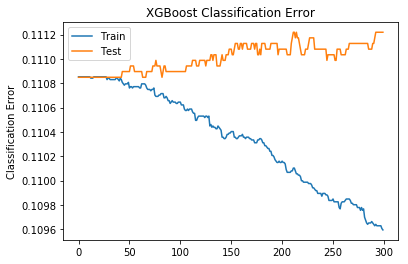

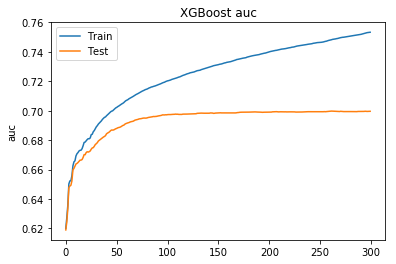

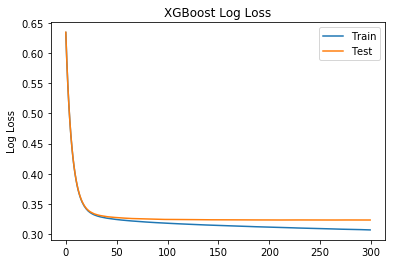

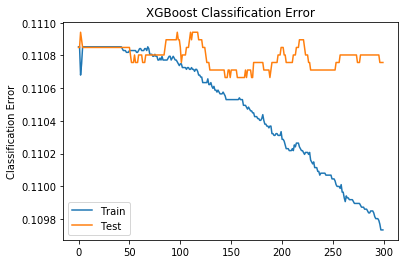

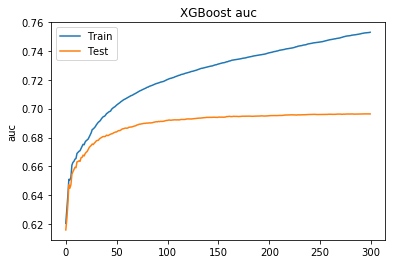

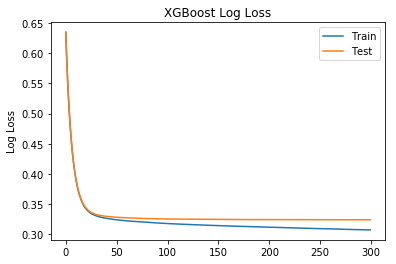

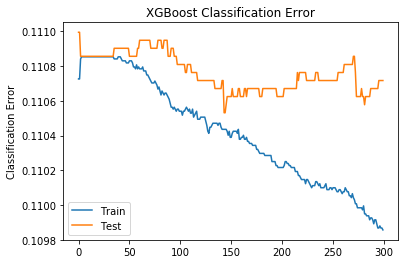

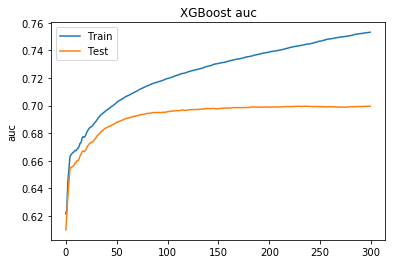

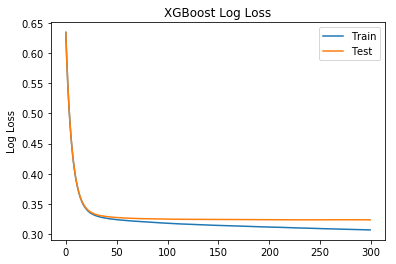

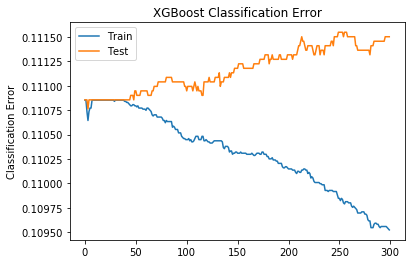

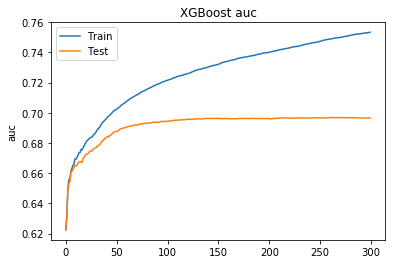

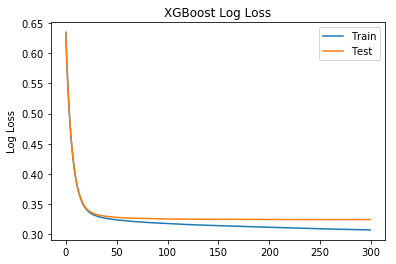

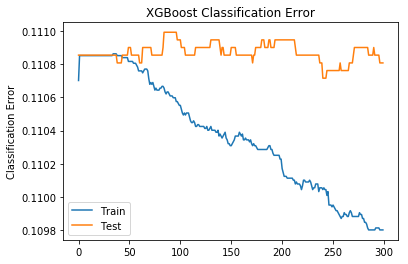

In [20]:
def plot_learning_curve(results):
    epochs = len(results['validation_0']['auc'])
    x_axis = range(0, epochs)
    # plot auc
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['auc'], label='Train')
    ax.plot(x_axis, results['validation_1']['auc'], label='Test')
    ax.legend()
    plt.ylabel('auc')
    plt.title('XGBoost auc')
    plt.show()
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

for i in range(kf.get_n_splits()):
    results = models[i].evals_result()
    plot_learning_curve(results)

In [39]:
model = models[-1]

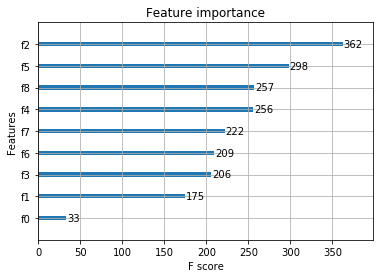

In [40]:
fig = xgb.plot_importance(model, max_num_features=10)

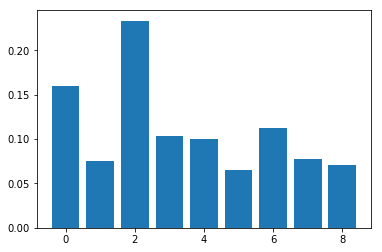

In [42]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [17]:
X306.columns

Index(['gender', 'age', 'aum227', '收入总和', '支出总和', '收支总和', '收支记录次数', '收入最大值',
       '支出最大值', '101_x',
       ...
       '305_y', '306_y', '307_y', '308_y', '309_y', '310_y', '311_y', '收入均值',
       '支出均值', '收支均值'],
      dtype='object', length=132)

In [ ]:
# print(X306.columns)
# print(model.feature_importances_)

## 提交

In [21]:
preds = pd.merge(pred_users306, pd.DataFrame(preds306, columns=['score']), left_index=True, right_index=True)
preds.head()

,id,score
0,1,0.087137
1,2,0.043843
2,3,0.023790
3,4,0.147362
4,5,0.124785


In [22]:
thresh = 0.5
a = preds[preds['score']<thresh].shape[0]
b = preds[preds['score']>=thresh].shape[0]
print(a,b,a/(a+b),b/(a+b))

94614 41 0.9995668480270455 0.0004331519729544134


In [23]:
import datetime
submit_dir = './submit/2/'
path_submit = submit_dir + 'submit'+ datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S") +'.csv'
preds.to_csv(path_submit,columns = ['id', 'score'], index=False)

In [24]:
import xlab

In [25]:
print(path_submit)

./submit/2/submit2019-05-08-09-59-27.csv


In [26]:
# 提交您的结果 注意：请勿上传data/下的文件，
xlab.ftcamp.submit(path_submit)

请输入您提交或查询的对应赛事编号：
1:赛题1：企业收支数据预测 
2:赛题2：基于收支记录判断借贷意愿 
3:赛题3：短文本分析 
4:赛题4：基于位置信息的服务推荐分析 
5:赛题5：上市公司财务造假识别 
（1/2/3/4/5）
 2


'您已成功提交题目赛题2：基于收支记录判断借贷意愿的结果，该题目今日提交次数剩余4次，请稍后前往题目对应的提交记录查看结果'

In [27]:
# 查看历史提交结果
xlab.ftcamp.get_submit_hist()

请输入您提交或查询的对应赛事编号：
1:赛题1：企业收支数据预测 
2:赛题2：基于收支记录判断借贷意愿 
3:赛题3：短文本分析 
4:赛题4：基于位置信息的服务推荐分析 
5:赛题5：上市公司财务造假识别 
（1/2/3/4/5）
 2


+---------+---------------------+----------+----------+
|   分数  |       提交时间      | 提交次数 |   原因   |
+---------+---------------------+----------+----------+
| 0.73622 | 2019-05-08 09:59:35 |    21    | 正常执行 |
|  0.735  | 2019-05-07 23:00:35 |    20    | 正常执行 |
| 0.72744 | 2019-05-07 22:46:23 |    19    | 正常执行 |
| 0.73565 | 2019-05-07 22:37:14 |    18    | 正常执行 |
| 0.73446 | 2019-05-07 22:26:57 |    17    | 正常执行 |
| 0.73571 | 2019-05-07 13:57:17 |    16    | 正常执行 |
| 0.73514 | 2019-05-06 21:59:12 |    15    | 正常执行 |
| 0.72701 | 2019-05-06 21:45:25 |    14    | 正常执行 |
| 0.72688 | 2019-05-06 20:58:09 |    13    | 正常执行 |
| 0.72754 | 2019-05-06 20:36:44 |    12    | 正常执行 |
| 0.72756 | 2019-05-06 15:42:54 |    11    | 正常执行 |
| 0.72639 | 2019-05-05 23:50:04 |    10    | 正常执行 |
| 0.72746 | 2019-05-05 23:38:32 |    9     | 正常执行 |
|  0.7226 | 2019-05-05 22:50:12 |    8     | 正常执行 |
| 0.71058 | 2019-05-05 14:04:31 |    7     | 正常执行 |
| 0.70879 | 2019-05-04 23:57:22 |    6     | 正常执行 |
| 0.66755 | 